## Financial Web Scraping with Pandas

In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Single stock prices

In [5]:
start = dt.datetime(2000,1,1)
end = dt.datetime.today()

In [5]:
df_stock = pdr.get_data_yahoo('AAPL', start,end)

In [6]:
df_stock.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883


In [7]:
df_stock.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,126.709999,118.389999,123.760002,125.860001,157859100.0,125.860001


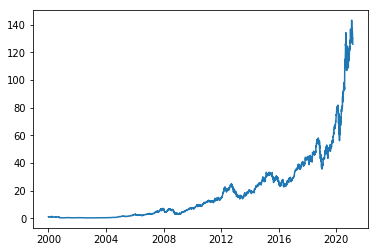

In [8]:
plt.plot(df_stock.index,df_stock['Close'])
plt.show()

### US Treasury

TREAST - U.S. Treasury securities held by the Federal Reserve ( Millions of Dollars )

FYGFDPUN - Federal Debt Held by the Public ( Millions of Dollars )

FDHBFIN - Federal Debt Held by Foreign and International Investors ( Billions of Dollars )

GFDEBTN - Federal Debt: Total Public Debt ( Millions of Dollars )

BAA10Y' - Baa Corporate Bond Yield Relative to Yield on 10-Year


In [9]:
tsy_tickers = ['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30',
               'TREAST', # -- U.S. Treasury securities held by the Federal Reserve ( Millions of Dollars )
               'FYGFDPUN', # -- Federal Debt Held by the Public ( Millions of Dollars )
               'FDHBFIN', # -- Federal Debt Held by Foreign and International Investors ( Billions of Dollars )
               'GFDEBTN', # -- Federal Debt: Total Public Debt ( Millions of Dollars )
               'BAA10Y', # -- Baa Corporate Bond Yield Relative to Yield on 10-Year
              ]
tsy_data = pdr.DataReader(tsy_tickers, 'fred').dropna(how='all').ffill()
tsy_data['FDHBFIN'] = tsy_data['FDHBFIN'] * 1000
tsy_data['GOV_PCT'] = tsy_data['TREAST'] / tsy_data['GFDEBTN']
tsy_data['HOM_PCT'] = tsy_data['FYGFDPUN'] / tsy_data['GFDEBTN']
tsy_data['FOR_PCT'] = tsy_data['FDHBFIN'] / tsy_data['GFDEBTN']

In [10]:
return_period = 5
#Y = tsy_data.loc[:, ['DGS1MO', 'DGS5', 'DGS30']].diff(return_period).shift(-return_period)
#return_period = 5
Y = tsy_data.loc[:, ['DGS1MO', 'DGS5', 'DGS30']].shift(-return_period)
Y.columns = [col+'_pred' for col in Y.columns]

#X = tsy_data.loc[:, ['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30', 'GOV_PCT', 'HOM_PCT', 'FOR_PCT', 'BAA10Y']].diff(return_period)
X = tsy_data.loc[:, ['DGS1MO', 'DGS3MO', 'DGS1', 'DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS30', 'GOV_PCT', 'HOM_PCT', 'FOR_PCT', 'BAA10Y']]

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.columns]
X = dataset.loc[:, X.columns]

In [11]:
dataset.head(1)

,DGS1MO_pred,DGS5_pred,DGS30_pred,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS30,GOV_PCT,HOM_PCT,FOR_PCT,BAA10Y
DATE,,,,,,,,,,,,,,,
2010-01-06,0.02,2.55,4.71,0.03,0.06,0.4,1.01,2.6,3.33,3.85,4.7,0.060799,0.649352,0.303598,2.49


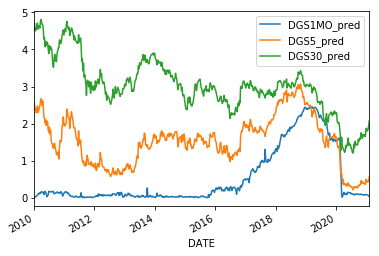

In [12]:
Y.plot()

In [4]:

syms = ['DGS10', 'DGS5', 'DGS2', 'DGS1MO', 'DGS3MO']
yc = pdr.DataReader(syms, 'fred') # could specify start date with start param here
names = dict(zip(syms, ['10yr', '5yr', '2yr', '1m', '3m']))
yc = yc.rename(columns=names)
yc = yc[['1m', '3m', '2yr', '5yr', '10yr']]

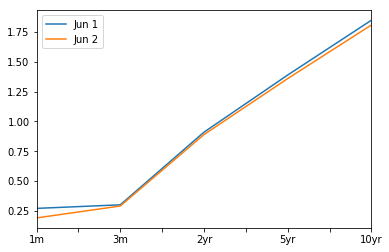

In [5]:
yc.loc['2016-06-01'].plot(label='Jun 1')
yc.loc['2016-06-02'].plot(label='Jun 2')
plt.legend(loc=0)

### Web Scaping Treasury website

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

soup = BeautifulSoup(requests.get('https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData').text,'lxml')
table = soup.find_all('m:properties')
tbondvalues = []
for i in table:
    tbondvalues.append([i.find('d:new_date').text[:10],i.find('d:bc_1month').text,i.find('d:bc_2month').text,i.find('d:bc_3month').text,i.find('d:bc_6month').text,i.find('d:bc_1year').text,i.find('d:bc_2year').text,i.find('d:bc_3year').text,i.find('d:bc_5year').text,i.find('d:bc_10year').text,i.find('d:bc_20year').text,i.find('d:bc_30year').text])
ustcurve = pd.DataFrame(tbondvalues,columns=['date','1m','2m','3m','6m','1y','2y','3y','5y','10y','20y','30y'])
ustcurve.iloc[:,1:] = ustcurve.iloc[:,1:].apply(pd.to_numeric)/100
ustcurve['date'] = pd.to_datetime(ustcurve['date'])

ModuleNotFoundError: No module named 'bs4'

In [1]:
from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'bs4'